# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a ML model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem definition

In a statement,
> Given clinical parametars about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository.

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll puruse the project.

## 4. Features



This is where you'll get different information about each of the features in your data.

**Create data dictionary**

A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a **subject matter expert** (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [1]:
# Import all the tools we need

# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

from scipy import stats
from scipy.stats import randint

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost.sklearn as xgb
from xgboost.sklearn import XGBClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load data

In [2]:
df = pd.read_csv('heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape # (rows, columns)

(303, 14)

## EDA 

The goal here is to find out more about the data and become a subject matter expert on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# How many of each class are there?
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

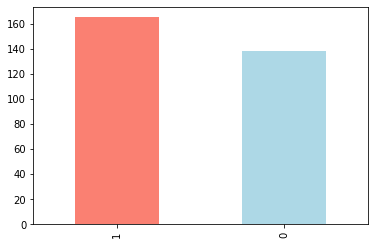

In [7]:
df['target'].value_counts().plot(kind='bar',color =['salmon','lightblue']);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


 ### Heart Disease Frequency according to Sex

In [11]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [12]:
# Compare target column with sex column
pd.crosstab(df['target'], df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


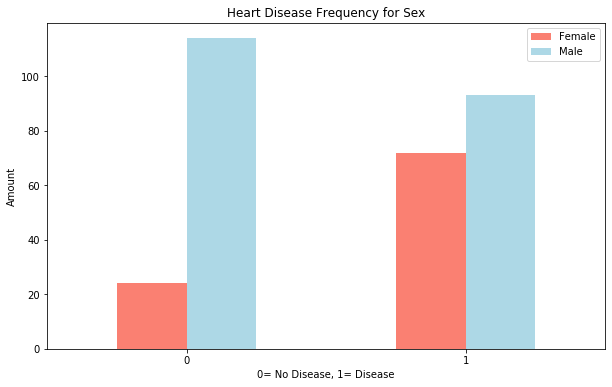

In [13]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind='bar', figsize=(10,6), color = ['salmon','lightblue'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0= No Disease, 1= Disease')
plt.ylabel('Amount')
plt.legend(['Female','Male'])
plt.xticks(rotation=0);

## Age vs. Max Heart Rate for Heart Disease

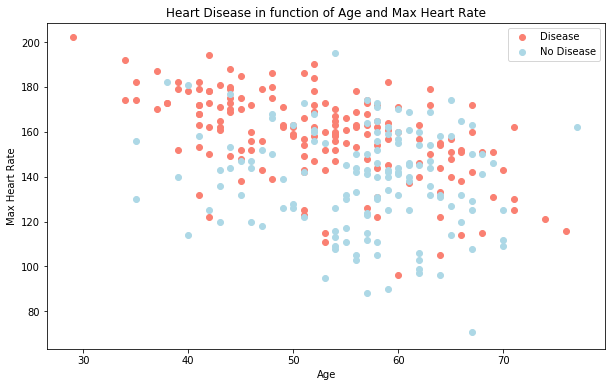

In [14]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],df.thalach[df.target==1], c='salmon')

# Scatter with negative examples
plt.scatter(df.age[df.target==0],df.thalach[df.target==0], c='lightblue');

# Add some helpful info
plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease']);

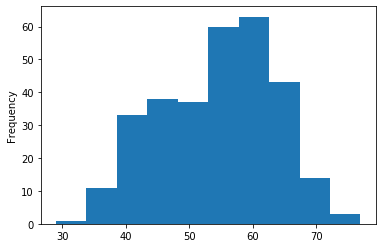

In [15]:
# Check the distribution of the age column with histogram
df.age.plot.hist();

## Heart Disease Frequency per Chest Pain Type

3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [16]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


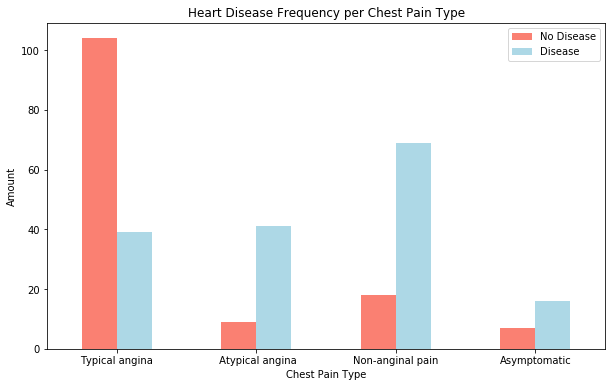

In [17]:
# Make the crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind='bar',figsize=(10,6),color=['salmon','lightblue'])
plt.title('Heart Disease Frequency per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No Disease','Disease'])
label=['Typical angina',' Atypical angina','Non-anginal pain','Asymptomatic']
x=[0,1,2,3]
plt.xticks(x,labels=label,rotation=0);

In [18]:
# make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


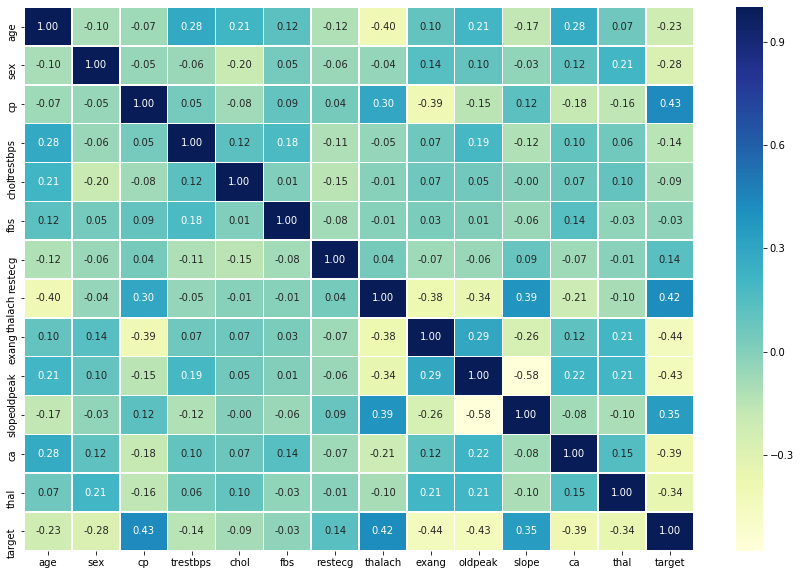

In [19]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5,fmt=".2f",cmap='YlGnBu');
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5);

## 5. Modelling

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
# Split data into X and y
X = df.drop('target',axis=1)
y = df['target']

In [22]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [23]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [24]:
# Split data into train and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [26]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64, 242)

Now we've got our data split into training and test sets, it's time to build a ML model.

We'll train it on the training set.

And we'll test it on the test set.

We're going to try 3 different ML models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [27]:
# Put models in a dictionary
models = {'Logistic Regression': LogisticRegression(), 'KNN': KNeighborsClassifier(), 'Random Forest': RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models,X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit- Learn machine learning models
    """
    # Set random seed
    np.random.seed(42)
    # Make a dict to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        #Fit the model to the data
        model.fit(X_train,y_train)
        #Evaluate the model and append its score to model_score
        model_scores[name]=model.score(X_test,y_test)
    return model_scores

In [28]:
models_score = fit_and_score(models, X_train,X_test,y_train,y_test)
models_score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model Comparison

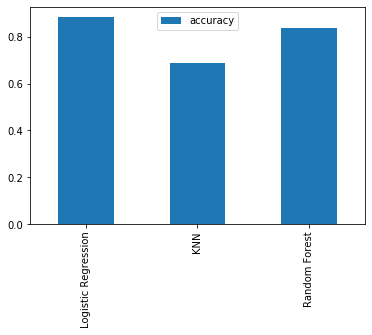

In [29]:
model_compare = pd.DataFrame(models_score, index=['accuracy'])
model_compare.T.plot.bar();

Let's look at the following:
* Hyperparametar tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

## Hyperparametar tuning

In [30]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #Fit 
    knn.fit(X_train,y_train)
    
    #Update the train score list
    train_scores.append(knn.score(X_train,y_train))
    
    #Update test score
    test_scores.append(knn.score(X_test,y_test))

In [31]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [32]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


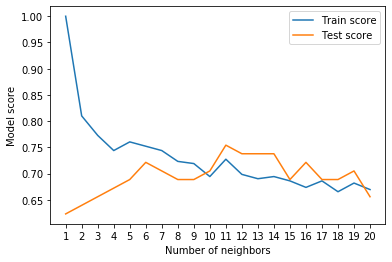

In [33]:
plt.plot(neighbors, train_scores, label='Train score')
plt.plot(neighbors, test_scores, label='Test score')
plt.xticks(np.arange(1,21,1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend()

print(f'Maximum KNN score on the test data: {max(test_scores)*100:.2f}%')

## Hyperparametar tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

... using RandomizedSearchCV

In [34]:
np.logspace(-4,4,20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [35]:
# Create a hyperparametar grid for LogisticRegression()
log_reg_grid= {'C': np.logspace(-4,4,20), 'solver': ['liblinear']}

# Create a hyperparametar grid for RandomForestClassifier

rf_grid = {'n_estimators': np.arange(10,1000,50), 'max_depth': [None, 3, 5, 10], 'min_samples_split': np.arange(2,20,2),
          'min_samples_leaf':np.arange(1,20,2)}

In [36]:
np.arange(10,1000,50)

array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])

In [37]:
# Tune LogisticRegression

np.random.seed(42)

#Setup random hyperparametar search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, cv=5,n_iter=20,verbose=True)

# Fit random hyperparametar search model for LogisticRegression

rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [38]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [39]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [40]:
# Tune RandomForest

np.random.seed(42)

#Setup random hyperparametar search for RandomForest
rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, cv=5,n_iter=20,verbose=True)

# Fit random hyperparametar search model for RandomForest

rs_rf.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   35.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [41]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [42]:
rs_rf.score(X_test,y_test)

0.8688524590163934

## Hyperparamater Tuning with GridSearchCV

In [43]:
log_reg_grid = {"C": np.logspace(-4,4,30),'solver':['liblinear']}
gs_log_reg = GridSearchCV(LogisticRegression(),param_grid=log_reg_grid, cv=5,verbose=True)
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 1.8...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5

In [44]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [45]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible

To make comparisons and evaluate our trained model, first we need to make predictions.

In [46]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [47]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [48]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

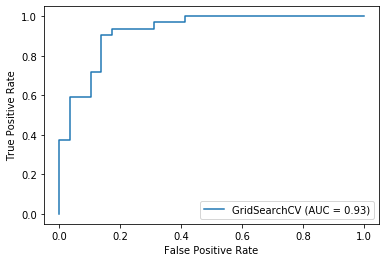

In [49]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg,X_test, y_test)

In [50]:
# Confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


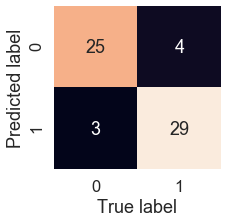

In [51]:
sns.set(font_scale= 1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
    
plot_conf_mat(y_test,y_preds)

<Figure size 7200x16560 with 0 Axes>

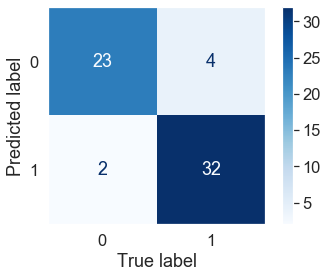

In [159]:
# 2nd way:
from sklearn.metrics import plot_confusion_matrix
plt.figure(figsize=(100, 230))
plot_confusion_matrix(gs_log_reg, X_test, y_test, cmap=plt.cm.Blues,values_format='d')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.grid(None)

In [53]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evalution metrics using cross-validation

We're going to calculate accuracy, precision, recall, and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score`

In [54]:
# Check best hyperparametars
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [55]:
# Create a new classifier with best parametars
clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [56]:
# Cross-validated accuraccy
cv_acc = cross_val_score(clf,X,y,cv=5,scoring='accuracy')
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [57]:
# Cross-validated precision

cv_precision = cross_val_score(clf,X,y,cv=5,scoring='precision')
cv_precision = np.mean(cv_precision)
cv_precision

0.8215873015873015

In [58]:
# Cross-validated recall

cv_recall = cross_val_score(clf,X,y,cv=5,scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [59]:
# Cross-validated f1-score

cv_f1 = cross_val_score(clf,X,y,cv=5,scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

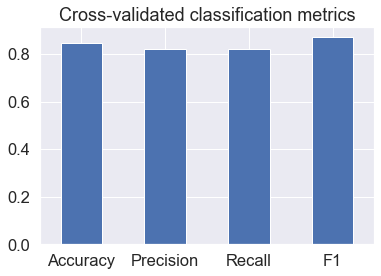

In [60]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({'Accuracy': cv_acc, 'Precision': cv_precision, 'Recall': cv_precision, 'F1': cv_f1,},index=[0])
cv_metrics.T.plot.bar(title='Cross-validated classification metrics',legend=False)
plt.xticks(rotation=0)

### Feature Importance

Feature Importance is another way of asking: "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each ML model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression model.

In [61]:
# Fit an instance of LogisticRegression
clf= LogisticRegression(C=0.20433597178569418, solver='liblinear')
clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.86044622,  0.66067059, -0.01156993, -0.00166374,
         0.04386122,  0.31275815,  0.02459361, -0.60413062, -0.5686283 ,
         0.45051625, -0.63609881, -0.67663383]])

In [63]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672775089892488,
 'sex': -0.8604462193284903,
 'cp': 0.6606705857793441,
 'trestbps': -0.01156993031867032,
 'chol': -0.0016637442407918324,
 'fbs': 0.04386122408903933,
 'restecg': 0.31275815497333875,
 'thalach': 0.024593612835517458,
 'exang': -0.6041306248075571,
 'oldpeak': -0.5686282991341255,
 'slope': 0.4505162464116119,
 'ca': -0.6360988070697587,
 'thal': -0.6766338279094292}

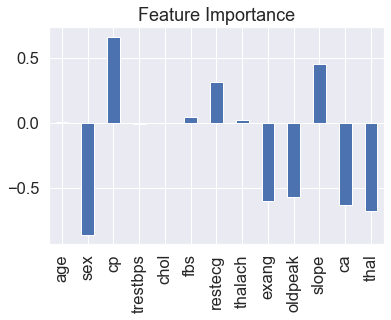

In [64]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance', legend=False)

In [65]:
pd.crosstab(df['sex'],df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [66]:
pd.crosstab(df['slope'],df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


# 6.Experimentation

If you haven't hit your evaluation metric yet... ask yourself...

* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models? (beyond what we've done so far)
* If your model is good enough (you have hit your evaluation metric) how would you export it and share it with others?



In [67]:
clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic')
param_dist = {'n_estimators': stats.randint(150, 1000),
              'learning_rate': stats.uniform(0.01, 0.6),
              'subsample': stats.uniform(0.3, 0.9),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.9),
              'min_child_weight': [1, 2, 3, 4]
             }

numFolds = 5
#kfold_5 = cross_validation.KFold(n = len(X), shuffle = True, n_folds = numFolds)

clf = RandomizedSearchCV(clf_xgb, 
                         param_distributions = param_dist,
                         cv = 5,  
                         n_iter = 10, # you want 5 here not 25 if I understand you correctly 
                         scoring = 'accuracy', 
                         error_score = 0, 
                         verbose = 3, 
                         n_jobs = -1)

clf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.7s finished


RandomizedSearchCV(cv=5, error_score=0,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scal...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002054C89FAC8>,
                                        'max

In [68]:
print(clf.best_params_)

clf.score(X_test,y_test)

{'colsample_bytree': 0.5374967003869658, 'learning_rate': 0.10313285667951, 'max_depth': 6, 'min_child_weight': 2, 'n_estimators': 254, 'subsample': 0.5284909554510673}


0.8688524590163934

In [69]:
clf_xgb = XGBClassifier(colsample_bytree=  0.8567277824711557,learning_rate= 0.0780722117624259,
 max_depth= 6,
 min_child_weight= 3,
 n_estimators= 624,
 subsample= 0.7535627739162105)
clf_xgb.fit(X_train,y_train)
clf_xgb.score(X_test,y_test)

0.8524590163934426

In [70]:
clf_xgb= XGBClassifier(learning_rate =0.01,
 n_estimators=5000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
clf_xgb.fit(X_train,y_train)
clf_xgb.score(X_test,y_test)

0.8688524590163934

In [71]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier()
cat.fit(X_train,y_train)
cat.score(X_test,y_test)

Learning rate set to 0.005621
0:	learn: 0.6886736	total: 51.6ms	remaining: 51.6s
1:	learn: 0.6849504	total: 52.6ms	remaining: 26.3s
2:	learn: 0.6812081	total: 53.7ms	remaining: 17.8s
3:	learn: 0.6769759	total: 54.8ms	remaining: 13.6s
4:	learn: 0.6724212	total: 55.9ms	remaining: 11.1s
5:	learn: 0.6681871	total: 56.9ms	remaining: 9.43s
6:	learn: 0.6660043	total: 57.7ms	remaining: 8.18s
7:	learn: 0.6621768	total: 58.7ms	remaining: 7.27s
8:	learn: 0.6575272	total: 59.7ms	remaining: 6.57s
9:	learn: 0.6545942	total: 60.7ms	remaining: 6.01s
10:	learn: 0.6510678	total: 61.8ms	remaining: 5.55s
11:	learn: 0.6471758	total: 62.8ms	remaining: 5.17s
12:	learn: 0.6437505	total: 63.8ms	remaining: 4.84s
13:	learn: 0.6399073	total: 64.8ms	remaining: 4.56s
14:	learn: 0.6365970	total: 65.7ms	remaining: 4.32s
15:	learn: 0.6322891	total: 66.7ms	remaining: 4.1s
16:	learn: 0.6284945	total: 68ms	remaining: 3.93s
17:	learn: 0.6243599	total: 69.2ms	remaining: 3.78s
18:	learn: 0.6207533	total: 70.3ms	remaining: 3

284:	learn: 0.2669182	total: 308ms	remaining: 773ms
285:	learn: 0.2664598	total: 309ms	remaining: 772ms
286:	learn: 0.2659202	total: 310ms	remaining: 771ms
287:	learn: 0.2657895	total: 311ms	remaining: 768ms
288:	learn: 0.2653954	total: 312ms	remaining: 767ms
289:	learn: 0.2647654	total: 313ms	remaining: 765ms
290:	learn: 0.2644299	total: 313ms	remaining: 764ms
291:	learn: 0.2637652	total: 314ms	remaining: 762ms
292:	learn: 0.2631191	total: 315ms	remaining: 760ms
293:	learn: 0.2626831	total: 316ms	remaining: 759ms
294:	learn: 0.2619612	total: 317ms	remaining: 757ms
295:	learn: 0.2613765	total: 318ms	remaining: 756ms
296:	learn: 0.2610241	total: 318ms	remaining: 754ms
297:	learn: 0.2605614	total: 319ms	remaining: 752ms
298:	learn: 0.2600164	total: 320ms	remaining: 751ms
299:	learn: 0.2594355	total: 321ms	remaining: 749ms
300:	learn: 0.2588403	total: 322ms	remaining: 748ms
301:	learn: 0.2585213	total: 323ms	remaining: 746ms
302:	learn: 0.2582320	total: 324ms	remaining: 745ms
303:	learn: 

455:	learn: 0.2036907	total: 459ms	remaining: 547ms
456:	learn: 0.2033855	total: 460ms	remaining: 546ms
457:	learn: 0.2029259	total: 461ms	remaining: 545ms
458:	learn: 0.2026655	total: 462ms	remaining: 544ms
459:	learn: 0.2023233	total: 462ms	remaining: 543ms
460:	learn: 0.2019704	total: 463ms	remaining: 542ms
461:	learn: 0.2016065	total: 464ms	remaining: 540ms
462:	learn: 0.2013541	total: 465ms	remaining: 539ms
463:	learn: 0.2011219	total: 466ms	remaining: 538ms
464:	learn: 0.2009703	total: 467ms	remaining: 537ms
465:	learn: 0.2008681	total: 468ms	remaining: 536ms
466:	learn: 0.2006592	total: 468ms	remaining: 535ms
467:	learn: 0.2003757	total: 469ms	remaining: 533ms
468:	learn: 0.2001218	total: 470ms	remaining: 532ms
469:	learn: 0.1999008	total: 471ms	remaining: 531ms
470:	learn: 0.1996430	total: 472ms	remaining: 530ms
471:	learn: 0.1995061	total: 473ms	remaining: 529ms
472:	learn: 0.1992084	total: 474ms	remaining: 528ms
473:	learn: 0.1988558	total: 474ms	remaining: 526ms
474:	learn: 

619:	learn: 0.1633281	total: 607ms	remaining: 372ms
620:	learn: 0.1630490	total: 607ms	remaining: 371ms
621:	learn: 0.1628632	total: 608ms	remaining: 370ms
622:	learn: 0.1626437	total: 609ms	remaining: 369ms
623:	learn: 0.1623950	total: 610ms	remaining: 368ms
624:	learn: 0.1621779	total: 611ms	remaining: 367ms
625:	learn: 0.1619783	total: 612ms	remaining: 366ms
626:	learn: 0.1618726	total: 613ms	remaining: 365ms
627:	learn: 0.1615568	total: 614ms	remaining: 364ms
628:	learn: 0.1614143	total: 615ms	remaining: 363ms
629:	learn: 0.1612649	total: 616ms	remaining: 362ms
630:	learn: 0.1609533	total: 616ms	remaining: 360ms
631:	learn: 0.1607619	total: 617ms	remaining: 359ms
632:	learn: 0.1604600	total: 618ms	remaining: 358ms
633:	learn: 0.1603367	total: 619ms	remaining: 357ms
634:	learn: 0.1599920	total: 620ms	remaining: 356ms
635:	learn: 0.1597186	total: 621ms	remaining: 355ms
636:	learn: 0.1594403	total: 622ms	remaining: 354ms
637:	learn: 0.1593956	total: 622ms	remaining: 353ms
638:	learn: 

791:	learn: 0.1324489	total: 757ms	remaining: 199ms
792:	learn: 0.1322757	total: 758ms	remaining: 198ms
793:	learn: 0.1321556	total: 759ms	remaining: 197ms
794:	learn: 0.1319221	total: 759ms	remaining: 196ms
795:	learn: 0.1318476	total: 760ms	remaining: 195ms
796:	learn: 0.1317706	total: 761ms	remaining: 194ms
797:	learn: 0.1316472	total: 762ms	remaining: 193ms
798:	learn: 0.1315018	total: 763ms	remaining: 192ms
799:	learn: 0.1313801	total: 764ms	remaining: 191ms
800:	learn: 0.1313303	total: 765ms	remaining: 190ms
801:	learn: 0.1312026	total: 765ms	remaining: 189ms
802:	learn: 0.1310485	total: 766ms	remaining: 188ms
803:	learn: 0.1308334	total: 767ms	remaining: 187ms
804:	learn: 0.1306363	total: 768ms	remaining: 186ms
805:	learn: 0.1304993	total: 769ms	remaining: 185ms
806:	learn: 0.1303766	total: 770ms	remaining: 184ms
807:	learn: 0.1302231	total: 771ms	remaining: 183ms
808:	learn: 0.1300016	total: 772ms	remaining: 182ms
809:	learn: 0.1297852	total: 773ms	remaining: 181ms
810:	learn: 

949:	learn: 0.1104620	total: 902ms	remaining: 47.5ms
950:	learn: 0.1103042	total: 903ms	remaining: 46.6ms
951:	learn: 0.1101543	total: 905ms	remaining: 45.6ms
952:	learn: 0.1100452	total: 905ms	remaining: 44.6ms
953:	learn: 0.1098778	total: 906ms	remaining: 43.7ms
954:	learn: 0.1097733	total: 907ms	remaining: 42.7ms
955:	learn: 0.1096612	total: 908ms	remaining: 41.8ms
956:	learn: 0.1095250	total: 909ms	remaining: 40.8ms
957:	learn: 0.1093786	total: 910ms	remaining: 39.9ms
958:	learn: 0.1092323	total: 911ms	remaining: 38.9ms
959:	learn: 0.1090593	total: 911ms	remaining: 38ms
960:	learn: 0.1089362	total: 912ms	remaining: 37ms
961:	learn: 0.1088786	total: 913ms	remaining: 36.1ms
962:	learn: 0.1087526	total: 914ms	remaining: 35.1ms
963:	learn: 0.1086565	total: 915ms	remaining: 34.2ms
964:	learn: 0.1085744	total: 916ms	remaining: 33.2ms
965:	learn: 0.1084159	total: 917ms	remaining: 32.3ms
966:	learn: 0.1083292	total: 918ms	remaining: 31.3ms
967:	learn: 0.1080639	total: 919ms	remaining: 30.4

0.8524590163934426

## CatBoostClasiifier

In [72]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [87]:
X = df.drop(['target'],axis=1)
y=df['target']

In [88]:
#Categorical features
category= np.where(X.dtypes != float)[0]
category

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12], dtype=int64)

In [89]:
# Looking on label balance on the dataset
print(f'Labels {set(y)}')
print(f'Zero count: {len(y)-sum(y)}, One count: {sum(y)}')

Labels {0, 1}
Zero count: 138, One count: 165


In [93]:
from catboost import CatBoostClassifier
model = CatBoostClassifier()
model.fit(X,y,cat_features=category,verbose=100)

Learning rate set to 0.006187
0:	learn: 0.6899917	total: 13ms	remaining: 13s
100:	learn: 0.4251274	total: 1.93s	remaining: 17.2s
200:	learn: 0.3335985	total: 3.83s	remaining: 15.2s
300:	learn: 0.2862672	total: 5.8s	remaining: 13.5s
400:	learn: 0.2521029	total: 7.87s	remaining: 11.8s
500:	learn: 0.2262358	total: 9.89s	remaining: 9.85s
600:	learn: 0.2062713	total: 11.9s	remaining: 7.88s
700:	learn: 0.1894746	total: 13.9s	remaining: 5.92s
800:	learn: 0.1728092	total: 15.9s	remaining: 3.96s
900:	learn: 0.1587203	total: 18.1s	remaining: 1.98s
999:	learn: 0.1459284	total: 20.1s	remaining: 0us


In [94]:
model.predict_proba(X)

array([[0.25524846, 0.74475154],
       [0.13465869, 0.86534131],
       [0.02958634, 0.97041366],
       [0.03844524, 0.96155476],
       [0.10107469, 0.89892531],
       [0.40376751, 0.59623249],
       [0.04813599, 0.95186401],
       [0.14222641, 0.85777359],
       [0.13258196, 0.86741804],
       [0.04841889, 0.95158111],
       [0.09444178, 0.90555822],
       [0.0294618 , 0.9705382 ],
       [0.05379136, 0.94620864],
       [0.09300251, 0.90699749],
       [0.07860438, 0.92139562],
       [0.06911057, 0.93088943],
       [0.03239278, 0.96760722],
       [0.09815562, 0.90184438],
       [0.09989151, 0.90010849],
       [0.15820733, 0.84179267],
       [0.65981841, 0.34018159],
       [0.05003532, 0.94996468],
       [0.07617215, 0.92382785],
       [0.10311184, 0.89688816],
       [0.18706489, 0.81293511],
       [0.10481213, 0.89518787],
       [0.05401846, 0.94598154],
       [0.03803268, 0.96196732],
       [0.12450282, 0.87549718],
       [0.07536633, 0.92463367],
       [0.

In [97]:
from catboost import Pool
pool = Pool(data = X, label=y, cat_features=category)

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

train_pool = Pool(X_train,y_train,cat_features=category)
test_pool = Pool(X_test,y_test,cat_features=category)

In [109]:
model = CatBoostClassifier(custom_loss=['AUC','Accuracy'])
model.fit(train_pool,eval_set=test_pool,verbose=100)

Learning rate set to 0.022321
0:	learn: 0.6786813	test: 0.6786833	best: 0.6786833 (0)	total: 27.4ms	remaining: 27.4s
100:	learn: 0.2628178	test: 0.3596769	best: 0.3596636 (99)	total: 1.9s	remaining: 16.9s
200:	learn: 0.1777831	test: 0.3358235	best: 0.3357868 (176)	total: 3.79s	remaining: 15.1s
300:	learn: 0.1333621	test: 0.3357778	best: 0.3350419 (220)	total: 5.6s	remaining: 13s
400:	learn: 0.1051862	test: 0.3363340	best: 0.3350419 (220)	total: 7.58s	remaining: 11.3s
500:	learn: 0.0799206	test: 0.3361903	best: 0.3343974 (454)	total: 9.56s	remaining: 9.52s
600:	learn: 0.0632298	test: 0.3338824	best: 0.3331852 (564)	total: 11.6s	remaining: 7.72s
700:	learn: 0.0521185	test: 0.3345542	best: 0.3323852 (616)	total: 13.9s	remaining: 5.92s
800:	learn: 0.0423513	test: 0.3368892	best: 0.3323852 (616)	total: 15.9s	remaining: 3.96s
900:	learn: 0.0361147	test: 0.3401125	best: 0.3323852 (616)	total: 18s	remaining: 1.97s
999:	learn: 0.0311413	test: 0.3426001	best: 0.3323852 (616)	total: 20s	remaining

In [153]:
model = CatBoostClassifier(custom_loss=['AUC','Accuracy'],use_best_model=True,learning_rate=0.05)
model.fit(train_pool,eval_set=test_pool,verbose=False,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [115]:
model.score(test_pool)

0.8524590163934426

In [120]:
print(f'Tree count: {model.tree_count_}')

Tree count: 617


### Cross Validation of CatBoostClassifier

In [154]:
#Stratified CV by default

from catboost import cv

learning_rate =0.05

params = {
    'loss_function': 'Logloss',
    'iterations': 100,
    'custom_loss':['AUC','Accuracy'],
    'learning_rate':learning_rate,
}

cv_data = cv(params=params,
             pool=train_pool,
             fold_count=5,
             shuffle=True,
             partition_random_seed=0,
             plot=True,
             verbose=False
            )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [137]:
params = {
    'loss_function': 'Logloss',
    'iterations': 100,
    'custom_loss':['AUC','Accuracy'],
    'learning_rate':0.05,
}

cv_data = cv(params=params,
             pool=train_pool,
             fold_count=5,
             shuffle=True,partition_random_seed=0,
             plot=True,
             verbose=False,
             stratified=False
            )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [138]:
cv_data.head(10)

,iterations,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std,test-AUC-mean,test-AUC-std,test-Accuracy-mean,test-Accuracy-std,train-Accuracy-mean,train-Accuracy-std
0,0,0.671384,0.008960,0.671010,0.007916,0.809995,0.042314,0.797194,0.038986,0.779980,0.019272
1,1,0.643610,0.011103,0.636592,0.008108,0.882075,0.033835,0.797364,0.031847,0.830655,0.038138
2,2,0.613093,0.012810,0.604093,0.007935,0.897896,0.028683,0.838776,0.031235,0.854388,0.023714
3,3,0.588644,0.013975,0.576106,0.006872,0.903034,0.029639,0.834694,0.032860,0.855403,0.018702
4,4,0.570029,0.015983,0.553958,0.009527,0.900650,0.026884,0.834609,0.025838,0.864660,0.015739
5,5,0.552459,0.015585,0.529159,0.008983,0.908612,0.032414,0.826531,0.017176,0.863640,0.011813
6,6,0.541218,0.014741,0.511325,0.009320,0.907706,0.029486,0.830697,0.029778,0.865702,0.003665
7,7,0.528804,0.014274,0.494284,0.012937,0.902343,0.032533,0.830697,0.029778,0.869852,0.009656
8,8,0.517061,0.014954,0.478069,0.013299,0.900886,0.032659,0.838946,0.021676,0.875028,0.014953
9,9,0.509747,0.013062,0.468343,0.013697,0.902488,0.032468,0.838861,0.026803,0.871925,0.014087


In [ ]:
# from catboost import CatBoostClassifier
# cat = CatBoostClassifier(iterations=1000,learning_rate=0.01,depth=12,eval_metric='Accuracy',random_seed = 42,bagging_temperature = 0.8,od_type='Iter',metric_period = 
#  1,od_wait=20)
# cat.fit(X_train,y_train)
# cat.score(X_test,y_test)

### Sklearn Grid Search

In [141]:
from sklearn.model_selection import GridSearchCV

param_grid = {'learning_rate':[0.001,0.1,0.5]}

clf = CatBoostClassifier(cat_features=category,verbose=100)
grid_search = GridSearchCV(clf, param_grid=param_grid,cv=10)
results = grid_search.fit(X_train,y_train)
results.best_estimator_.get_params()

0:	learn: 0.6922946	total: 31.2ms	remaining: 31.1s
100:	learn: 0.6280435	total: 1.75s	remaining: 15.6s
200:	learn: 0.5752735	total: 3.5s	remaining: 13.9s
300:	learn: 0.5318112	total: 5.38s	remaining: 12.5s
400:	learn: 0.4951361	total: 7.21s	remaining: 10.8s
500:	learn: 0.4647592	total: 8.98s	remaining: 8.95s
600:	learn: 0.4388965	total: 10.9s	remaining: 7.25s
700:	learn: 0.4168349	total: 12.8s	remaining: 5.45s
800:	learn: 0.3979769	total: 14.7s	remaining: 3.65s
900:	learn: 0.3817762	total: 16.6s	remaining: 1.82s
999:	learn: 0.3664367	total: 18.7s	remaining: 0us
0:	learn: 0.6923959	total: 18.8ms	remaining: 18.8s
100:	learn: 0.6220940	total: 1.75s	remaining: 15.5s
200:	learn: 0.5664857	total: 3.23s	remaining: 12.9s
300:	learn: 0.5207654	total: 4.76s	remaining: 11.1s
400:	learn: 0.4813967	total: 6.41s	remaining: 9.58s
500:	learn: 0.4487999	total: 8.18s	remaining: 8.15s
600:	learn: 0.4205809	total: 10.1s	remaining: 6.68s
700:	learn: 0.3977445	total: 11.9s	remaining: 5.08s
800:	learn: 0.378

600:	learn: 0.0068818	total: 12.8s	remaining: 8.51s
700:	learn: 0.0057480	total: 14.9s	remaining: 6.34s
800:	learn: 0.0049636	total: 16.9s	remaining: 4.2s
900:	learn: 0.0042435	total: 19s	remaining: 2.08s
999:	learn: 0.0036929	total: 21.2s	remaining: 0us
0:	learn: 0.6263558	total: 31.1ms	remaining: 31s
100:	learn: 0.1048835	total: 2.13s	remaining: 18.9s
200:	learn: 0.0380122	total: 4.35s	remaining: 17.3s
300:	learn: 0.0208705	total: 6.54s	remaining: 15.2s
400:	learn: 0.0145978	total: 8.74s	remaining: 13.1s
500:	learn: 0.0112328	total: 10.9s	remaining: 10.9s
600:	learn: 0.0091481	total: 13.1s	remaining: 8.69s
700:	learn: 0.0077412	total: 15.2s	remaining: 6.48s
800:	learn: 0.0066962	total: 17.5s	remaining: 4.34s
900:	learn: 0.0058438	total: 19.7s	remaining: 2.16s
999:	learn: 0.0051649	total: 21.7s	remaining: 0us
0:	learn: 0.6497941	total: 26.9ms	remaining: 26.9s
100:	learn: 0.0995323	total: 1.99s	remaining: 17.7s
200:	learn: 0.0435120	total: 3.96s	remaining: 15.8s
300:	learn: 0.0240050	t

100:	learn: 0.0090839	total: 2.04s	remaining: 18.2s
200:	learn: 0.0040391	total: 4.07s	remaining: 16.2s
300:	learn: 0.0023450	total: 6.04s	remaining: 14s
400:	learn: 0.0017061	total: 7.95s	remaining: 11.9s
500:	learn: 0.0013936	total: 9.86s	remaining: 9.82s
600:	learn: 0.0011767	total: 11.7s	remaining: 7.76s
700:	learn: 0.0010246	total: 13.7s	remaining: 5.85s
800:	learn: 0.0008927	total: 15.7s	remaining: 3.89s
900:	learn: 0.0007721	total: 17.5s	remaining: 1.93s
999:	learn: 0.0006875	total: 19.4s	remaining: 0us
0:	learn: 0.6924891	total: 20.8ms	remaining: 20.8s
100:	learn: 0.6261076	total: 1.96s	remaining: 17.5s
200:	learn: 0.5733846	total: 3.6s	remaining: 14.3s
300:	learn: 0.5308865	total: 5.2s	remaining: 12.1s
400:	learn: 0.4963037	total: 6.98s	remaining: 10.4s
500:	learn: 0.4663614	total: 8.69s	remaining: 8.65s
600:	learn: 0.4411537	total: 10.6s	remaining: 7.04s
700:	learn: 0.4188972	total: 12.5s	remaining: 5.31s
800:	learn: 0.4011550	total: 14.3s	remaining: 3.55s
900:	learn: 0.38386

{'learning_rate': 0.001,
 'verbose': 100,
 'cat_features': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12], dtype=int64)}

### Overfitting Detector

In [148]:
model_with_early_stop = CatBoostClassifier(iterations=5000, learning_rate=0.03,early_stopping_rounds=400)
model_with_early_stop.fit(train_pool,eval_set=test_pool,verbose=False,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [151]:
print(model_with_early_stop.tree_count_)

394


### Model predictions

In [152]:
model = CatBoostClassifier(learning_rate=0.001)
model.fit(train_pool,verbose=False)